<h2 style="text-align:center;color:#fca103">Importation de Librairies</h2><br/>

In [16]:

# pandas : panel data , pour une facile manipulation des données.
import pandas as pd

# svm : ensemble de méthodes d'apprentissage supervisé utilisées pour la classification et la régression et la détection.
from sklearn import svm

# GridSearchCV : pour parcourir les hyperparamètres prédéfinis et d'adapter notre estimateur avec les meilleures parametres
from sklearn.model_selection import GridSearchCV

# os : des fonctionnalités dépendantes du système d'exploitation.
import os

# matplotlib : pour dessiner des graphiques, des tracés ...
import matplotlib.pyplot as plt

# resize : pour le traitement de la taille des images
from skimage.transform import resize

# imread : lecture des images
from skimage.io import imread

# numpy : numerical python extensions , pour la manipulation de tableaux et les opérations mathématiques.
import numpy as np

# train_test_split : pour separer la partie test de la partie apprentissage
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# pickle : gere le processus de conversion d'un objet Python en un flux d'octets pour le stocker dans un fichier/base de données.
import pickle


<h2 style="text-align:center;color:#fca103">Pré-Traitement</h2><br/>

In [17]:

# l'étiquettage des données
Categories=['voiture','bateau']

# flat_data_arr : pour enregistrer les images en un seul bloc 
flat_data_arr=[]

# liste des étiquettes des images
target_arr=[]

# chemin de la BD des images
datadir='./DB'

# parcourir les categories
for i in Categories:
  path=os.path.join(datadir,i)
    
  # pré-traitement de chaque image et stockage dans le tableau "flat_data_arr"
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
    

# étiquettage
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['etiquette']=target


hi


<h2 style="text-align:center;color:#fca103">Données : Test | Apprentissage </h2><br/>

In [18]:

# entrées
x=df.iloc[:,:-1]

# sorties
y=df.iloc[:,-1]

# division des donnees en 2 parties : donnees d'apprentissage et de test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77,stratify=y)


<h2 style="text-align:center;color:#fca103">Apprentissage</h2><br/>

In [19]:

# apprentissage automatique

"""
hyperparametres : C : Le paramètre de régularisation (lambda) sert de degré d'importance accordé aux erreurs de classification. 
SVM pose un problème d'optimisation quadratique qui cherche à maximiser la marge entre les deux classes et à minimiser 
le nombre d'erreurs de classification. 
"""

# gamma : degree de nayau polynomia, par défaut = 3


# kernel : type de fonction noyau, par défaut 'rbf'
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

# svc : support vector classifier
svc=svm.SVC(probability=True)

# selectionnement des meilleures parametres
model=GridSearchCV(svc,param_grid)

# apprentissage
model.fit(x_train,y_train)
print('apprentissage est fait')

# les meilleurs parametres choisis
model.best_params_


apprentissage est fait


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [27]:

# prédiction
y_pred=model.predict(x_test)
print("les photos sont dans les categories :  ")
y_pred


les photos sont dans les categories :  


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [28]:

# taux de l'apprentissage
print({accuracy_score(y_pred,y_test)*100},"%" )


{100.0} %


In [29]:

# sauvegarder le modèle
pickle.dump(model,open('modelevoiturebateau.p','wb'))


<h2 style="text-align:center;color:#fca103">Tests</h2><br/>

inserer le lien de l'image : C:\Users\hamza\Desktop\TP_SVM\DB\voiture\29033.jpg


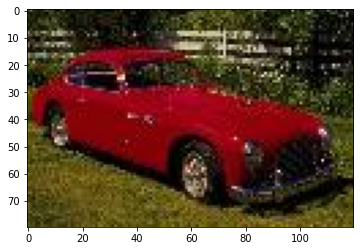

voiture = 99.1129607828246%
bateau = 0.8870392171754097%
l'image predite est : voiture


In [30]:

# tests

model=pickle.load(open('modelevoiturebateau.p','rb'))

url=input('inserer le lien de l\'image : ')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("l\'image predite est : " + Categories[model.predict(l)[0]])
